In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
#KNN
from sklearn.neighbors import KNeighborsClassifier
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
#NaiveBayes
from sklearn.naive_bayes import GaussianNB
#extreme gradient boost
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras import regularizers
from sklearn.svm import SVC

In [ ]:
data=pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

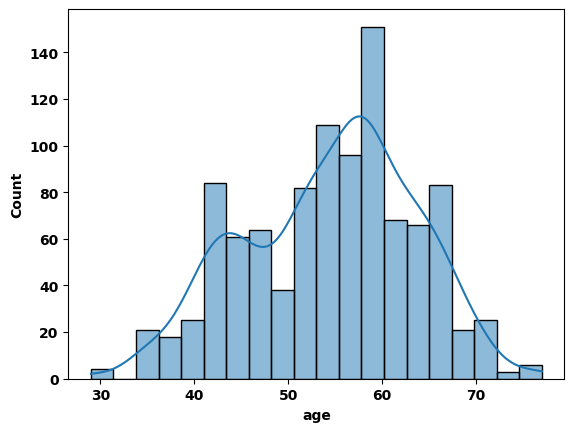

In [ ]:
sns.histplot(data['age'], bins=20, kde=True)
plt.show()

In [ ]:
for i in list(data.columns):
  print("{} --> {}".format(i,data[i].value_counts().shape[0]))

age --> 41
sex --> 2
cp --> 4
trestbps --> 49
chol --> 152
fbs --> 2
restecg --> 3
thalach --> 91
exang --> 2
oldpeak --> 40
slope --> 3
ca --> 5
thal --> 4
target --> 2


In [ ]:
### sütunların targeti hangi yönde etkilediğini gösteriyoruz .Veri setindeki sayısal sütunların birbirleri arasındaki korelasyonu gözlemliyoruz.
correlation_matrix=data.corr()
correlation_matrix["target"].sort_values()

oldpeak    -0.438441
exang      -0.438029
ca         -0.382085
thal       -0.337838
sex        -0.279501
age        -0.229324
trestbps   -0.138772
chol       -0.099966
fbs        -0.041164
restecg     0.134468
slope       0.345512
thalach     0.422895
cp          0.434854
target      1.000000
Name: target, dtype: float64

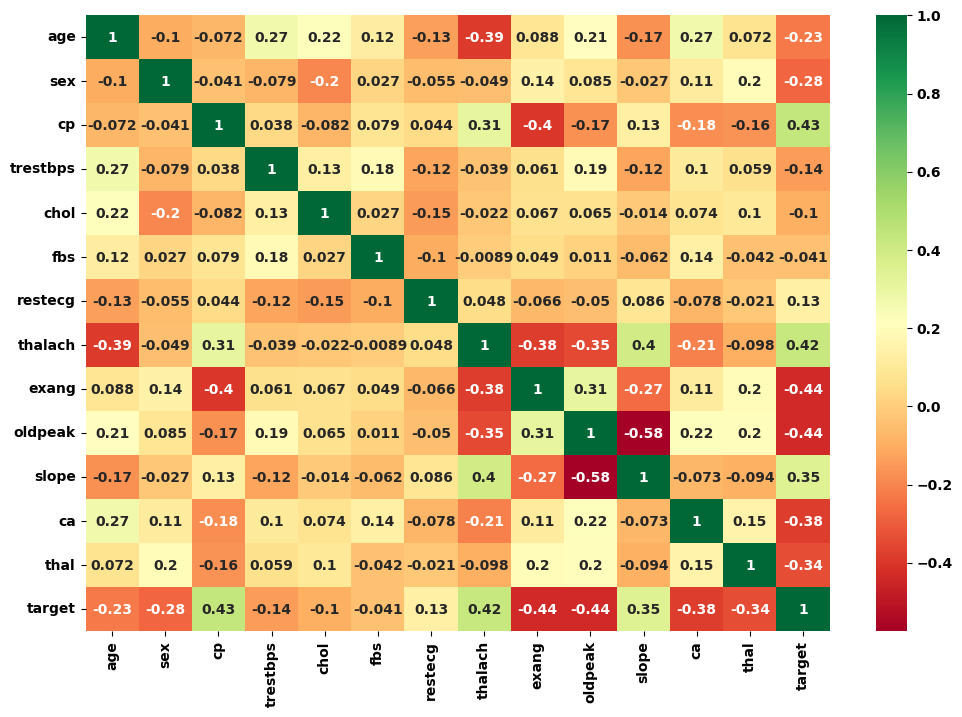

In [ ]:
import seaborn as sns
correlation_matrix=data.corr()
top_corr_features=correlation_matrix.index
plt.figure(figsize=(12,8))
sns.heatmap(data[top_corr_features].corr(),annot=True,cmap='RdYlGn')
plt.show()

**Data Processing**

In [ ]:
#ONE HOT ENCODER: kategorik olan sütunlar one-hot encoding ile dönüştürülüyor. Her bir kategorik değer, ayrı bir sütun haline getirilir ve bu sütunlar 0 veya 1 değerlerini alır.
#Bu, makine öğrenimi algoritmalarının kategorik verilerle çalışmasını kolaylaştırır.
columns_to_encode=["sex","cp","fbs","restecg","exang","slope","ca","thal"]
dataset=pd.get_dummies(data,columns=columns_to_encode)

In [ ]:
# Normalizasyon sayısal özellikler (age, trestbps, chol, thalach, oldpeak) StandardScaler kullanılarak normalize edilir.
#Normalizasyon, özelliklerin aynı ölçeğe sahip olmasını sağlar, bu da birçok makine öğrenimi algoritması için önemlidir.
scaler=StandardScaler()
columns_to_scale=['age','trestbps','chol','thalach','oldpeak']
dataset[columns_to_scale]=scaler.fit_transform(dataset[columns_to_scale])

In [ ]:
y=dataset['target']
x=dataset.drop(['target'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=5)

**LOGISTIC REGRESSION**

In [ ]:
logreg=LogisticRegression()

In [ ]:
logreg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
ypred_prob=logreg.predict_proba(x_test)
ypred=np.argmax(ypred_prob,axis=1)
dummy=pd.DataFrame(ypred_prob)
dummy["ypred"]=ypred
dummy.head()

,0,1,ypred
0,0.065136,0.934864,1
1,0.502345,0.497655,0
2,0.707733,0.292267,0
3,0.978017,0.021983,0
4,0.267778,0.732222,1


In [ ]:
logreg_predict = logreg.predict(x_test)
logreg_conf_matrix = confusion_matrix(y_test, logreg_predict)
logreg_acc_score = accuracy_score(y_test, logreg_predict)
print("CONFUSSION MATRIX")
print(logreg_conf_matrix,"\n")
print("CLASSIFICATION REPORT:")
print(classification_report(y_test,logreg_predict))

CONFUSSION MATRIX
[[138  28]
 [ 12 161]] 

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       166
           1       0.85      0.93      0.89       173

    accuracy                           0.88       339
   macro avg       0.89      0.88      0.88       339
weighted avg       0.89      0.88      0.88       339



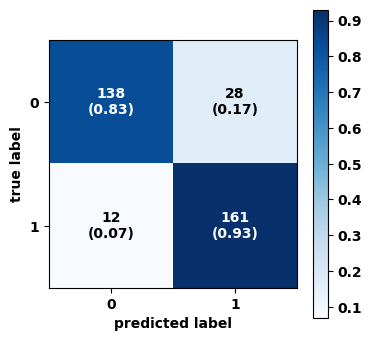

In [ ]:
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
cm=metrics.confusion_matrix(y_true=y_test,y_pred=logreg_predict)
plot_confusion_matrix(conf_mat=cm,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      figsize=(4,4))

plt.show()

In [ ]:
print("Accuracy of Logistic Regression:",logreg_acc_score*100,'\n')

Accuracy of Logistic Regression: 88.20058997050147 



In [ ]:
score=cross_val_score(logreg,x,y,cv=5)
print("Cross-Validation Mean Score:", score.mean()*100)

Cross-Validation Mean Score: 85.85365853658537


**KNN**

In [ ]:
knn_scores=[]
for k in range(1,21):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  knn_scores.append(knn.score(x_test,y_test))


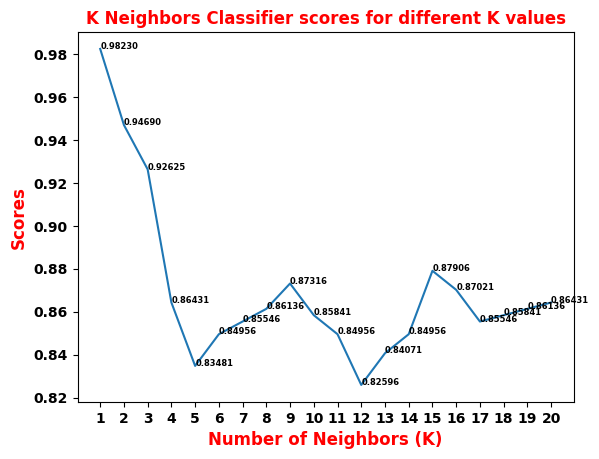

In [ ]:
plt.plot([k for k in range(1,21)],knn_scores)
for i in range(1, 21):
    plt.text(i, knn_scores[i-1], "{:.5f}".format(knn_scores[i-1]), fontsize='6')
plt.xticks([i for i in range(1,21)])
plt.xlabel('Number of Neighbors (K)',color='Red',weight='bold',fontsize='12')
plt.ylabel('Scores',color='Red',weight='bold',fontsize='12')
plt.title('K Neighbors Classifier scores for different K values',color='Red',weight='bold',fontsize='12')
plt.show()
plt.rcParams["font.weight"]="bold"
plt.rcParams["axes.labelweight"]="bold"

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn_predict = knn.predict(x_test)
knn_acc_score = accuracy_score(y_test, knn_predict)
print("CONFUSSION MATRIX")
print(confusion_matrix(y_test, knn_predict),"\n")
print("CLASSIFICATION REPORT:")
print(classification_report(y_test,knn_predict))

CONFUSSION MATRIX
[[153  13]
 [ 12 161]] 

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       166
           1       0.93      0.93      0.93       173

    accuracy                           0.93       339
   macro avg       0.93      0.93      0.93       339
weighted avg       0.93      0.93      0.93       339



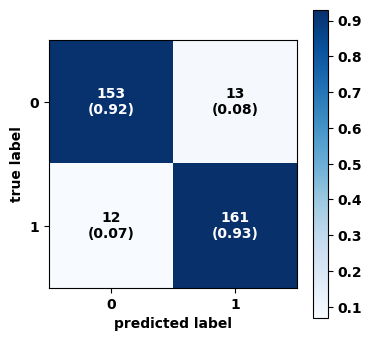

In [ ]:
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
cm=metrics.confusion_matrix(y_true=y_test,y_pred=knn_predict)
plot_confusion_matrix(conf_mat=cm,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      figsize=(4,4))

plt.show()

In [ ]:
print("Accuracy of kNN:",knn_acc_score*100,'\n')

Accuracy of kNN: 92.62536873156341 



In [ ]:
score=cross_val_score(knn,x,y,cv=5)
print("Cross-Validation Mean Score:", score.mean()*100)

Cross-Validation Mean Score: 93.17073170731706


**RANDOM FOREST**

In [ ]:
randomForest = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=7)

In [ ]:
randomForest.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=20, random_state=12)

In [ ]:
randomForest_y_pred=randomForest.predict(x_test)
randomForest_y_pred_quant=randomForest.predict_proba(x_test)[:,1]

In [ ]:
print(classification_report(y_test,randomForest_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       166
           1       0.95      0.99      0.97       173

    accuracy                           0.97       339
   macro avg       0.97      0.97      0.97       339
weighted avg       0.97      0.97      0.97       339



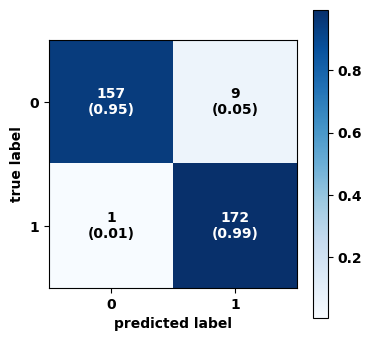

In [ ]:
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
cm=metrics.confusion_matrix(y_true=y_test,y_pred=randomForest_y_pred)
plot_confusion_matrix(conf_mat=cm,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      figsize=(4,4))

plt.show()

In [ ]:
randomForest_acc_score = accuracy_score(y_test, randomForest_y_pred)
print("Accuracy:",metrics.accuracy_score(y_true=y_test,y_pred=randomForest_y_pred)*100,"\n")


Accuracy: 97.05014749262537 



In [ ]:
score=cross_val_score(randomForest,x,y,cv=7)
print("Cross-Validation Mean Score:", score.mean()*100)

Cross-Validation Mean Score: 97.16841726906027


**NAIVE BAYES**

In [ ]:
naiveBayes = GaussianNB()
naiveBayes.fit(x_train,y_train)
naiveBayes_pred = naiveBayes.predict(x_test)
naiveBayes_conf_matrix = confusion_matrix(y_test, naiveBayes_pred)
naiveBayes_acc_score = accuracy_score(y_test, naiveBayes_pred)
print("confussion matrix")
print(naiveBayes_conf_matrix,"\n")
print("CLASSIFICATION REPORT:")
print(classification_report(y_test,naiveBayes_pred))

confussion matrix
[[129  37]
 [ 16 157]] 

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       166
           1       0.81      0.91      0.86       173

    accuracy                           0.84       339
   macro avg       0.85      0.84      0.84       339
weighted avg       0.85      0.84      0.84       339



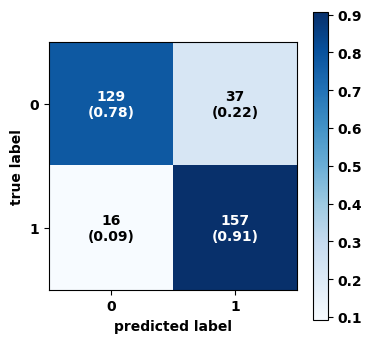

In [ ]:
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
cm=metrics.confusion_matrix(y_true=y_test,y_pred=naiveBayes_pred)
plot_confusion_matrix(conf_mat=cm,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      figsize=(4,4))

plt.show()

In [ ]:
print("Accuracy of Naive Bayes model:",naiveBayes_acc_score*100,'\n')

Accuracy of Naive Bayes model: 84.36578171091446 



In [ ]:
score=cross_val_score(naiveBayes,x,y,cv=7)
print("Cross-Validation Mean Score:", score.mean()*100)

Cross-Validation Mean Score: 84.1953219644022


**EXTREME GRADIENT BOOST**

In [ ]:
xgb = XGBClassifier(learning_rate=0.01, n_estimators=75, max_depth=20,gamma=0.8, subsample=0.52,colsample_bytree=0.6,seed=27,
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(x_train, y_train)
xgb_predicted = xgb.predict(x_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix,"\n")
print("CLASSIFICATION REPORT:")
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[133  33]
 [  8 165]] 

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.94      0.80      0.87       166
           1       0.83      0.95      0.89       173

    accuracy                           0.88       339
   macro avg       0.89      0.88      0.88       339
weighted avg       0.89      0.88      0.88       339



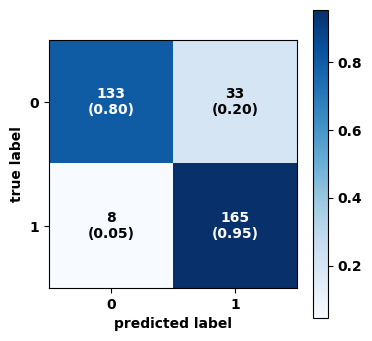

In [ ]:
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
cm=metrics.confusion_matrix(y_true=y_test,y_pred=xgb_predicted)
plot_confusion_matrix(conf_mat=cm,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      figsize=(4,4))

plt.show()

In [ ]:
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')

Accuracy of Extreme Gradient Boost: 87.90560471976401 



In [ ]:
score=cross_val_score(xgb,x,y,cv=7)
print("Cross-Validation Mean Score:", score.mean()*100)

Cross-Validation Mean Score: 89.654139542314


**ARTIFICAL NEURAL NETWORK-- TENSORFLOW**

In [ ]:
def create_tf_model():
  tf_model=tf.keras.models.Sequential([
      tf.keras.layers.Dense(64, activation='relu', input_dim=x_train.shape[1], kernel_regularizer=regularizers.l2(0.008)),
      tf.keras.layers.Dropout(0,5),
      tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.008)),
      tf.keras.layers.Dropout(0,5),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  return tf_model
model=create_tf_model()

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [ ]:
  model.fit(x=x_train,y=y_train, validation_data = (x_test,y_test),epochs=100, batch_size=32,verbose=1)

Epoch 1/100
22/22 [==============================] - 1s 15ms/step - loss: 1.2664 - accuracy: 0.6487 - val_loss: 1.1160 - val_accuracy: 0.8024
Epoch 2/100
22/22 [==============================] - 0s 5ms/step - loss: 1.0423 - accuracy: 0.8222 - val_loss: 0.9411 - val_accuracy: 0.8230
Epoch 3/100
22/22 [==============================] - 0s 4ms/step - loss: 0.8913 - accuracy: 0.8484 - val_loss: 0.8306 - val_accuracy: 0.8555
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 0.7886 - accuracy: 0.8732 - val_loss: 0.7449 - val_accuracy: 0.8584
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 0.7145 - accuracy: 0.8659 - val_loss: 0.6869 - val_accuracy: 0.8584
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 0.6553 - accuracy: 0.8761 - val_loss: 0.6312 - val_accuracy: 0.8761
Epoch 7/100
22/22 [==============================] - 0s 5ms/step - loss: 0.6070 - accuracy: 0.8863 - val_loss: 0.5959 - val_accuracy: 0.8702
Epoch 8/100


In [ ]:
modelkaybi=pd.DataFrame(model.history.history)

<Axes: >

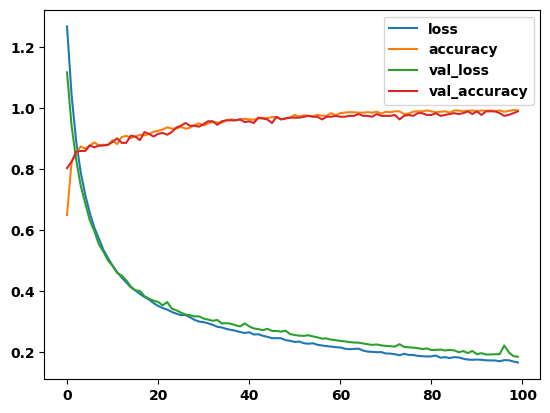

In [ ]:
modelkaybi.plot()

In [ ]:
tf_y_pred = model.predict(x_test)
tf_y_pred_binary = (tf_y_pred > 0.5).astype(int)

# Confusion Matrix ve Diğer Metrikler
conf_matrix = confusion_matrix(y_test, tf_y_pred_binary)
tf_acc_score = accuracy_score(y_test, tf_y_pred_binary)

print("CONFUSION MATRIX:")
print(conf_matrix, "\n")

print("CLASSIFICATION REPORT:")
print(classification_report(y_test, tf_y_pred_binary))


11/11 [==============================] - 0s 2ms/step
CONFUSION MATRIX:
[[162   4]
 [  0 173]] 

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       166
           1       0.98      1.00      0.99       173

    accuracy                           0.99       339
   macro avg       0.99      0.99      0.99       339
weighted avg       0.99      0.99      0.99       339



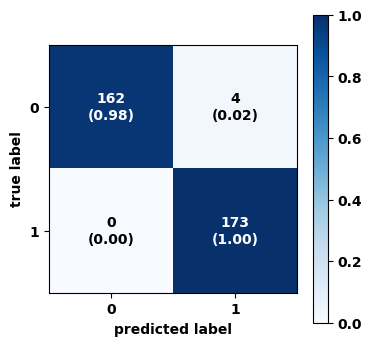

In [ ]:
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
cm=metrics.confusion_matrix(y_true=y_test,y_pred=tf_y_pred_binary)
plot_confusion_matrix(conf_mat=cm,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      figsize=(4,4))

plt.show()

In [ ]:
print("Accuracy of TensorFlow Model:", tf_acc_score * 100, '\n')

Accuracy of TensorFlow Model: 98.82005899705014 



**DECISION TREE**

In [ ]:
decTree = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
decTree.fit(x_train, y_train)
decTree_predicted = decTree.predict(x_test)
decTree_conf_matrix = confusion_matrix(y_test, decTree_predicted)
decTree_acc_score = accuracy_score(y_test, decTree_predicted)
print("CONFUSION MATRIX:")
print(decTree_conf_matrix,"\n")

print("CLASSIFICATION REPORT:")
print(classification_report(y_test,decTree_predicted))

CONFUSION MATRIX:
[[157   9]
 [  9 164]] 

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       166
           1       0.95      0.95      0.95       173

    accuracy                           0.95       339
   macro avg       0.95      0.95      0.95       339
weighted avg       0.95      0.95      0.95       339



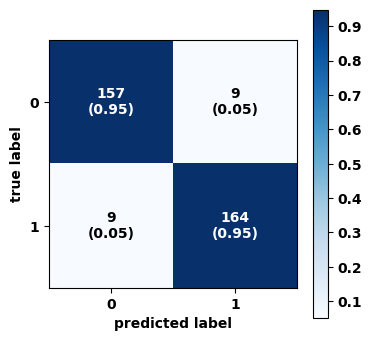

In [ ]:
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
cm=metrics.confusion_matrix(y_true=y_test,y_pred=decTree_predicted)
plot_confusion_matrix(conf_mat=cm,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      figsize=(4,4))

plt.show()

In [ ]:
print("Accuracy of DecisionTreeClassifier:",decTree_acc_score*100,'\n')

Accuracy of DecisionTreeClassifier: 94.69026548672566 



In [ ]:
score=cross_val_score(decTree,x,y,cv=7)
print("Cross-Validation Mean Score:", score.mean()*100)

Cross-Validation Mean Score: 94.04861749004885


**SUPPORT VECTOR**

In [ ]:
supportVector =  SVC(kernel='rbf', C=2)
supportVector.fit(x_train, y_train)
supportVector_predicted = supportVector.predict(x_test)
supportVector_conf_matrix = confusion_matrix(y_test, supportVector_predicted)
supportVector_acc_score = accuracy_score(y_test, supportVector_predicted)
print("CONFUSION MATRIX:")
print(supportVector_conf_matrix,"\n")

print("CLASSIFICATION REPORT:")
print(classification_report(y_test,supportVector_predicted))

CONFUSION MATRIX:
[[153  13]
 [  4 169]] 

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       166
           1       0.93      0.98      0.95       173

    accuracy                           0.95       339
   macro avg       0.95      0.95      0.95       339
weighted avg       0.95      0.95      0.95       339



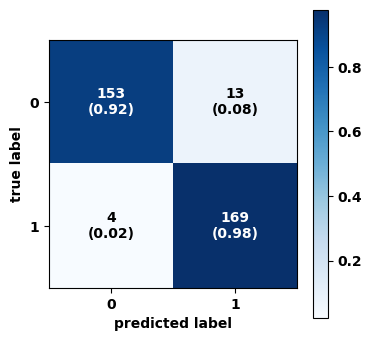

In [ ]:
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
cm=metrics.confusion_matrix(y_true=y_test,y_pred=supportVector_predicted)
plot_confusion_matrix(conf_mat=cm,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      figsize=(4,4))

plt.show()

In [ ]:
print("Accuracy of Support Vector Classifier:",supportVector_acc_score*100,'\n')

Accuracy of Support Vector Classifier: 94.98525073746312 



In [ ]:
score=cross_val_score(supportVector,x,y,cv=7)
print("Cross-Validation Mean Score:", score.mean()*100)

Cross-Validation Mean Score: 95.02110041668331


In [ ]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine','Artificial Neural Network'], 'Accuracy': [logreg_acc_score*100,
                    naiveBayes_acc_score*100,randomForest_acc_score*100,xgb_acc_score*100,knn_acc_score*100,decTree_acc_score*100,supportVector_acc_score*100,tf_acc_score * 100]})
model_ev

,Model,Accuracy
0,Logistic Regression,88.200590
1,Naive Bayes,84.365782
2,Random Forest,97.050147
3,Extreme Gradient Boost,87.905605
4,K-Nearest Neighbour,92.625369
5,Decision Tree,94.690265
6,Support Vector Machine,94.985251
7,Artificial Neural Network,98.820059



Bu kod, StackingCVClassifier'ın kullanımını gösterir. Stacking, birden çok modelin tahminlerini birleştirerek daha güçlü bir model oluşturma yöntemidir.

In [ ]:
from mlxtend.classifier import StackingCVClassifier
scv=StackingCVClassifier(classifiers=[logreg,knn,naiveBayes,xgb,randomForest,decTree,supportVector],
                         meta_classifier= knn,random_state=42)
scv.fit(x_train,y_train)
scv_predicted = scv.predict(x_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("CONFUSION MATRIX:")
print(scv_conf_matrix,"\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print("CLASSIFICATION REPORT:")
print(classification_report(y_test,scv_predicted))

CONFUSION MATRIX:
[[157   9]
 [  1 172]] 

Accuracy of StackingCVClassifier: 97.05014749262537 

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       166
           1       0.95      0.99      0.97       173

    accuracy                           0.97       339
   macro avg       0.97      0.97      0.97       339
weighted avg       0.97      0.97      0.97       339

